接下來，設置好 virtual display，並引入所有必要的套件。

In [1]:
%%capture
'''
from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()
'''
%matplotlib inline
import matplotlib.pyplot as plt
'''
from IPython import display
'''
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
from tqdm.notebook import tqdm

建立一個intersection 環境

In [2]:
from torch.nn.modules.module import T
import numpy as np
import random 
import copy

class intersection:
    def __init__(self, n_direction = 4, ab_lanes=1, cd_lanes=1):
        self.n_direction = n_direction
        self.direct = []
        self.cfz = []
        for i in range(4):
            self.cfz.append(cars(-2, -2, -2 , ' '))
        if n_direction >= 2:
            self.direct.append(self.direction(ab_lanes))
            self.direct.append(self.direction(ab_lanes))
            if n_direction >= 3:
                self.direct.append(self.direction(cd_lanes))
                if n_direction == 4:
                    self.direct.append(self.direction(cd_lanes))

        for i in range(4):
            self.direct[i].lanes[0].wq.append(cars(-2, -2, -2 , ' '))

    class direction:
        def __init__(self, n_lane):
            self.n_lane = n_lane
            self.lanes = []
            for i in range(n_lane):
                self.lanes.append(self.q())
        class q:
            def __init__(self):
                self.wq = []
                # entered_time, from, to, 

    def sent_env(self , time_now):
        to_which_line = np.zeros((8,4))
        to_which_area = np.zeros((8,5))
        
        for i in range(4):
            if(self.cfz[i].next(self.cfz[i].current_cfz) == 0):
                to_which_area[i][0] = 1
            elif(self.cfz[i].next(self.cfz[i].current_cfz) == 1):
                to_which_area[i][1] = 1
            elif(self.cfz[i].next(self.cfz[i].current_cfz) == 2):
                to_which_area[i][2] = 1
            elif(self.cfz[i].next(self.cfz[i].current_cfz) == 3):
                to_which_area[i][3] = 1
            elif(self.cfz[i].next(self.cfz[i].current_cfz) == -1):
                to_which_area[i][4] = 1
        
        for i in range(4):
            if(self.direct[i].lanes[0].wq[0].next(self.direct[i].lanes[0].wq[0].current_cfz) == 0):
                to_which_area[i+4][0] = 1
            elif(self.direct[i].lanes[0].wq[0].next(self.direct[i].lanes[0].wq[0].current_cfz) == 1):
                to_which_area[i+4][1] = 1
            elif(self.direct[i].lanes[0].wq[0].next(self.direct[i].lanes[0].wq[0].current_cfz) == 2):
                to_which_area[i+4][2] = 1
            elif(self.direct[i].lanes[0].wq[0].next(self.direct[i].lanes[0].wq[0].current_cfz) == 3):
                to_which_area[i+4][3] = 1
            elif(self.direct[i].lanes[0].wq[0].next(self.direct[i].lanes[0].wq[0].current_cfz) == -1):
                to_which_area[i+4][4] = 1
        to_which_area.flatten()
        for i in range(4):
            if(self.cfz[i].to_lane == 5):
                to_which_line[i][0] = 1
            elif(self.cfz[i].to_lane == 6):
                to_which_line[i][1] = 1
            elif(self.cfz[i].to_lane == 9):
                to_which_line[i][2] = 1
            elif(self.cfz[i].to_lane == 10):
                to_which_line[i][3] = 1
        for i in range(4):
            if(self.direct[i].lanes[0].wq[0].to_lane == 5):
                to_which_line[i+4][0] = 1
            elif(self.direct[i].lanes[0].wq[0].to_lane == 6):
                to_which_line[i+4][1] = 1
            elif(self.direct[i].lanes[0].wq[0].to_lane == 9):
                to_which_line[i+4][2] = 1
            elif(self.direct[i].lanes[0].wq[0].to_lane == 10):
                to_which_line[i+4][3] = 1
        to_which_line.flatten()
        
        
        num_4 = 1 if self.direct[0].lanes[0].wq[0].in_time != -2 else 0
        num_7 = 1 if self.direct[1].lanes[0].wq[0].in_time != -2 else 0
        num_8 = 1 if self.direct[2].lanes[0].wq[0].in_time != -2 else 0
        num_11 = 1 if self.direct[3].lanes[0].wq[0].in_time != -2 else 0
        
        time_4 = time_now - self.direct[0].lanes[0].wq[0].in_time if self.direct[0].lanes[0].wq[0].in_time != -2 else 0
        time_7 = time_now - self.direct[1].lanes[0].wq[0].in_time if self.direct[1].lanes[0].wq[0].in_time != -2 else 0
        time_8 = time_now - self.direct[2].lanes[0].wq[0].in_time if self.direct[2].lanes[0].wq[0].in_time != -2 else 0
        time_11 = time_now - self.direct[3].lanes[0].wq[0].in_time if self.direct[3].lanes[0].wq[0].in_time != -2 else 0
        time_0 = time_now - self.cfz[0].in_time if self.cfz[0].to_lane != -2 else 0
        time_1 = time_now - self.cfz[1].in_time if self.cfz[1].to_lane != -2 else 0
        time_2 = time_now - self.cfz[2].in_time if self.cfz[2].to_lane != -2 else 0
        time_3 = time_now - self.cfz[3].in_time if self.cfz[3].to_lane != -2 else 0
        car_0 = 1 if(self.cfz[0].to_lane != -2) else 0
        car_1 = 1 if(self.cfz[1].to_lane != -2) else 0
        car_2 = 1 if(self.cfz[2].to_lane != -2) else 0
        car_3 = 1 if(self.cfz[3].to_lane != -2) else 0
        wait_time = [ time_4 , time_7 , time_8 , time_11]
        output = [car_0 , car_1 , car_2 , car_3  , num_4, num_7 , num_8 , num_11]
        #output = np.append(output , wait_time )
        output = np.append(output , to_which_line)
        output = np.append(output , to_which_area)
        return output
    # num_car waiting 4, 7, 11, 8, cfz 0123 have car or not, 0123 4 7 11 8 heading to where -1 = none


class cars:
    def __init__(self, in_time, from_lane, to_lane , symbol):
        self.in_time = in_time
        self.from_lane = from_lane
        self.to_lane = to_lane
        self.current_cfz = from_lane
        self.symbol = symbol

    def move(self, to_current_cfz):
        self.current_cfz = to_current_cfz
        
    def action(self, move_or_not):
        if move_or_not == 0:
            self.move(self.current_cfz)
        else:
            if(self.current_cfz == 4):
                self.move(0)
            elif(self.current_cfz == 7):
                self.move(2)
            elif(self.current_cfz == 11):
                self.move(3)
            elif(self.current_cfz == 8):
                self.move(1)
            elif (self.current_cfz == 0):
                if(self.to_lane == 10 or self.to_lane == 9):
                    self.move(2)
                elif(self.to_lane == 6):
                    self.move(-1)
                elif(self.to_lane == 5):
                    self.move(1)
            elif (self.current_cfz == 1):
                if(self.to_lane == 10 or self.to_lane == 6):
                    self.move(0)
                elif(self.to_lane == 5):
                    self.move(-1)
                elif(self.to_lane == 9):
                    self.move(3)
            elif (self.current_cfz == 2):
                if(self.to_lane == 9 or self.to_lane == 5):
                    self.move(3)
                elif(self.to_lane == 10):
                    self.move(-1)
                elif(self.to_lane == 6):
                    self.move(0)
            elif (self.current_cfz == 3):
                if(self.to_lane == 5 or self.to_lane == 6):
                    self.move(1)
                elif(self.to_lane == 9):
                    self.move(-1)
                elif(self.to_lane == 10):
                    self.move(2)
    def next(self , position ):
        if(self.in_time == -2):
            return -2
        elif(position == 4):
            return 0
        elif(position == 7):
            return 2
        elif(position == 11):
            return 3
        elif(position == 8):
            return 1
        elif (position == 0):
            if(self.to_lane == 10 or self.to_lane == 9):
                return 2
            elif(self.to_lane == 6):
                return -1
            elif(self.to_lane == 5):
                return 1
        elif (position == 1):
            if(self.to_lane == 10 or self.to_lane == 6):
                return 0
            elif(self.to_lane == 5):
                return -1
            elif(self.to_lane == 9):
                return 3
        elif (position == 2):
            if(self.to_lane == 9 or self.to_lane == 5):
                return 3
            elif(self.to_lane == 10):
                return -1
            elif(self.to_lane == 6):
                return 0
        elif (position == 3):
            if(self.to_lane == 5 or self.to_lane == 6):
                return 1
            elif(self.to_lane == 9):
                return -1
            elif(self.to_lane == 10):
                return 2
        return -1

class environment:
    def __init__(self , max_count ,prob , is_show):
        self.MAX_COUNT = max_count
        self.inter = intersection(4, 1, 1)
        self.data = self.init_data(prob)
        self.timeframe = 0
        self.count = 0
        self.crash_count = 0
        self.crash_total_count = 0
        self.is_show = is_show
        
    def init_data(self , car_rate):
        # generate data
        time_frame = 0
        data = np.full((self.MAX_COUNT+10, 4), -1)
        count = 0
        symbol_count = ord('a')
        while True:
            time_frame += 1
            for i in [4,7,8,11]:
                gen = np.random.choice([0, 1], p=[1-car_rate, car_rate])
                from_lane = i
                to_lane = 0
                if gen == 1:
                    #to_lane = random.choice([5, 6, 9, 10])
                    if from_lane == 4:
                        to_lane = random.choice([6, 9, 10])
                    elif from_lane == 7:
                        to_lane = random.choice([5, 9, 10])
                    elif from_lane == 8:
                        to_lane = random.choice([5, 6, 10])
                    elif from_lane == 11:
                        to_lane = random.choice([5, 6 , 9 ])

                    data[count] = np.array([time_frame, from_lane, to_lane , symbol_count])
                    symbol_count += 1
                    if symbol_count > ord('z'):
                        symbol_count = ord('a')
                    count += 1
            if count > self.MAX_COUNT:
                break
        return data
    def varify(self , before , after):
      reward = 0
      for i in range(8):
        if before[i].in_time != after[i].in_time and before[i].from_lane != after[i].from_lane and before[i].to_lane != after[i].to_lane:
          reward += 500
        elif before[i].in_time != -2 and after[i].in_time != -2:
          reward -= 150
      return reward
          
    def is_change(self , before , after):
      count = 0
      for i in range(8):
        if before[i].in_time == -2 and after[i].in_time == -2:
          count += 1
        elif before[i].in_time != after[i].in_time and before[i].from_lane != after[i].from_lane and before[i].to_lane != after[i].to_lane:
          return False

      if count == 8:
        return False
      return True

    def step(self , actions):
        reward = 0.0
        temp = self.inter.sent_env(self.timeframe)
        if( temp[0] + temp[1] + temp[2] + temp[3]+ temp[4] + temp[5] + temp[6] + temp[7] < 1 and self.count > self.MAX_COUNT):
            if self.is_show:
                self.show_env()
            return self.inter.sent_env(self.timeframe) , 0 , True # observations , rewards , done


        current_cars = [copy.deepcopy(self.inter.cfz[0])  , copy.deepcopy(self.inter.cfz[1]), copy.deepcopy(self.inter.cfz[2]), copy.deepcopy(self.inter.cfz[3]),
                        copy.deepcopy(self.inter.direct[0].lanes[0].wq[0]), copy.deepcopy(self.inter.direct[1].lanes[0].wq[0]),
                        copy.deepcopy(self.inter.direct[2].lanes[0].wq[0]), copy.deepcopy(self.inter.direct[3].lanes[0].wq[0])]

        current_cars2 = [copy.deepcopy(self.inter.cfz[0])  , copy.deepcopy(self.inter.cfz[1]), copy.deepcopy(self.inter.cfz[2]), copy.deepcopy(self.inter.cfz[3]),
                        copy.deepcopy(self.inter.direct[0].lanes[0].wq[0]), copy.deepcopy(self.inter.direct[1].lanes[0].wq[0]),
                        copy.deepcopy(self.inter.direct[2].lanes[0].wq[0]), copy.deepcopy(self.inter.direct[3].lanes[0].wq[0])]

        # after actions
        after_cars = []
        for i in range(8):
            temp = 1 if actions[i] > 0.5 else 0
            current_cars[i].action(temp)
            after_cars.append(current_cars[i])
        
        crash_unit = np.zeros((4,))
        crash = 0
        for i in range(8):
            for j in range(i , 8):
                if i != j and after_cars[i].current_cfz == after_cars[j].current_cfz and after_cars[j].current_cfz >= 0:
                    crash += 1
                    crash_unit[after_cars[i].current_cfz] += 2
        
        deadlock_count = 0
        for i in range(4):
            temp = after_cars[i].next(after_cars[i].current_cfz)
            if( temp < 4 and temp >= 0):
                deadlock_count += 1
        if deadlock_count == 4:
              crash += 1


        if crash >= 1 :
            temp = self.inter.sent_env(self.timeframe)
            self.crash_count += 1
            self.crash_total_count += 1
            if self.is_show:
                self.show_env()
            if(self.crash_count >= 30):
                return temp , -1000 , True
            return  temp , -1000 , False
        
        if self.is_change(current_cars2 , after_cars) :
            reward -= 1000
            '''
            if self.is_show:
                temp = self.inter.sent_env(self.timeframe)
                
                self.crash_count += 1
                if(self.crash_count >= 30):
                    return temp , -1000 , True
                
                return  temp , -1000 , False
            '''
          
            '''
            temp = self.inter.sent_env(self.timeframe)
            self.crash_count += 1
            self.crash_total_count += 1
            if self.is_show:
                self.show_env()
            if(self.crash_count >= 30):
                return temp , -1001 , True
            return  temp , -1001 , False
            '''
        else :
          reward += self.varify(current_cars2 , after_cars)


        
        


        #先清 cfz
        for i in range(4):
            self.inter.cfz[i] = cars(-2, -2, -2, ' ')
        #update cfz 裡面的車
        for i in range(8):
            cur_cfz = after_cars[i].current_cfz
            ## -1 是通過 intersection
            if cur_cfz == -1:
                #pass the intersection
                reward += 1000
                pass
            elif cur_cfz == -2:
                pass
            if cur_cfz in range(4):
                self.inter.cfz[cur_cfz] = after_cars[i]
        
        for i in range(4):
            if after_cars[i+4].current_cfz != self.inter.direct[i].lanes[0].wq[0].from_lane:
                del self.inter.direct[i].lanes[0].wq[0]
                if not self.inter.direct[i].lanes[0].wq:
                    self.inter.direct[i].lanes[0].wq.append(cars(-2,-2,-2, ' '))
        
        
        for i in range(4):
            while(self.inter.direct[i].lanes[0].wq and self.inter.direct[i].lanes[0].wq[0].in_time == -2):
                del self.inter.direct[i].lanes[0].wq[0]

        while self.data[self.count , 0] == self.timeframe:
            from_lane = self.data[self.count, 1]
            to_lane = self.data[self.count, 2]

            if from_lane == 4: from_lane_idx = 0
            elif from_lane == 7: from_lane_idx = 1 
            elif from_lane == 8: from_lane_idx = 2 
            elif from_lane == 11: from_lane_idx = 3

            car = cars(self.timeframe, from_lane, to_lane , chr(self.data[self.count , 3]))
            self.inter.direct[from_lane_idx].lanes[0].wq.append(car)
            self.count += 1

        for i in range(4):
            if not self.inter.direct[i].lanes[0].wq:
                self.inter.direct[i].lanes[0].wq.append(cars(-2,-2,-2, ' '))
                    
        output = self.inter.sent_env(self.timeframe)
        '''
        for i in range(4):
            if output[i+12]-5 < 0:
              reward += 1 * (output[i+12]-5)**2
            else :
              reward -= 0.1 * (output[i+12]-5)**2
        '''

        self.timeframe += 1
        self.crash_count = 0
        
        if self.is_show:
          self.show_env()

        return output , reward , False

    def show_env(self):
        num_4 = len(self.inter.direct[0].lanes[0].wq) if self.inter.direct[0].lanes[0].wq[0].in_time != -2 else 0
        num_7 = len(self.inter.direct[1].lanes[0].wq) if self.inter.direct[1].lanes[0].wq[0].in_time != -2 else 0
        num_8 = len(self.inter.direct[2].lanes[0].wq) if self.inter.direct[2].lanes[0].wq[0].in_time != -2 else 0
        num_11 = len(self.inter.direct[3].lanes[0].wq) if self.inter.direct[3].lanes[0].wq[0].in_time != -2 else 0
        car_0 = 1 if self.inter.cfz[0].in_time != -2 else 0
        car_1 = 1 if self.inter.cfz[1].in_time != -2 else 0
        car_2 = 1 if self.inter.cfz[2].in_time != -2 else 0
        car_3 = 1 if self.inter.cfz[3].in_time != -2 else 0
        car_4_2 = ' '
        #if num_4 >= 2:
        #    car_4_2 = self.inter.direct[0].lanes[0].wq[1].symbol 
        car_7_2 = ' '
        #if num_7 >= 2:
        #    car_7_2 = self.inter.direct[0].lanes[1].wq[1].symbol
        car_8_2 = ' '
        #if num_8 >= 2:
        #    car_8_2 = self.inter.direct[0].lanes[2].wq[1].symbol
        car_11_2 = ' '
        #if num_11 >= 2:
        #    car_11_2 = self.inter.direct[0].lanes[3].wq[1].symbol 
        
        print("    |%c| |    " % car_4_2)
        print("____|%c| |____" % self.inter.direct[0].lanes[0].wq[0].symbol)
        print("____|%c|%c|_%c_%c" % ( self.inter.cfz[0].symbol, self.inter.cfz[1].symbol , self.inter.direct[2].lanes[0].wq[0].symbol , car_8_2))
        print("%c_%c_|%c|%c|____" % (car_7_2 , self.inter.direct[1].lanes[0].wq[0].symbol , self.inter.cfz[2].symbol , self.inter.cfz[3].symbol))
        print("    | |%c|    " % self.inter.direct[3].lanes[0].wq[0].symbol)
        print("    | |%c|    " % car_11_2)
        print(self.timeframe)
        print(self.inter.cfz[0].to_lane , self.inter.cfz[1].to_lane , self.inter.cfz[2].to_lane , self.inter.cfz[3].to_lane ,
                self.inter.direct[0].lanes[0].wq[0].to_lane, self.inter.direct[1].lanes[0].wq[0].to_lane 
                ,self.inter.direct[2].lanes[0].wq[0].to_lane ,self.inter.direct[3].lanes[0].wq[0].to_lane)
        
        return self.timeframe
    
    def return_timeframe(self):
        return self.timeframe
    def return_crash(self):
        return self.crash_total_count

        

'''
env = environment(1000 , 0.25)
done = 0
actions = [0,0,0,0,0,0,0,0]
while(done == 0):avg_total_reward
    actions = list(input().split())
    actions = [float(i) for i in actions]
    observation , reward , done = env.step(actions)
    print(observation , reward , done)
'''




#___|4|5|___
#_6_ 0 1 _8_
#_7_ 2 3 _9_
#  |10|11|





'\nenv = environment(1000 , 0.25)\ndone = 0\nactions = [0,0,0,0,0,0,0,0]\nwhile(done == 0):avg_total_reward\n    actions = list(input().split())\n    actions = [float(i) for i in actions]\n    observation , reward , done = env.step(actions)\n    print(observation , reward , done)\n'

In [3]:
import time
start = time.time()

In [4]:
class PolicyGradientNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(80, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 8)
        self.d = nn.Dropout()
        self.bach1 = nn.BatchNorm1d(256)
        self.bach2 = nn.BatchNorm1d(64)
        self.sig = nn.Sigmoid()
        self.re = nn.ReLU()

    def forward(self, state):
        hid = self.re(self.fc1(state))
        hid = self.re(self.fc2(hid))
        return self.sig(self.fc3(hid))

In [5]:

class PolicyGradientAgent():
    
    def __init__(self, network):
        self.network = network
        self.optimizer = optim.AdamW(self.network.parameters(), lr=0.001)
         
    def forward(self, state):
        return self.network(state)

    def learn(self, probs , rewards):
        loss = (-probs * rewards).sum() # You don't need to revise this to pass simple baseline (but you can)
        loss.requres_grad = True
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def sample(self, state , test):
        action_prob = self.network(torch.FloatTensor(state))
        if test:
            actions = torch.FloatTensor([ 1 if action_prob[i] > 0.5 else 0 for i in range(8)])
        else:
            actions = torch.FloatTensor([ 1 if action_prob[i] > random.random() else 0 for i in range(8)])# 1 if action_prob[i] > 0.9 else 0 if action_prob[i] < 0.1 else
        action_prob = actions * action_prob + (1 - actions) * (1 - action_prob)
        action_prob = torch.prod(action_prob)
        return actions, action_prob

    def save(self, PATH): # You should not revise this
        Agent_Dict = {
            "network" : self.network.state_dict(),
            "optimizer" : self.optimizer.state_dict()
        }
        torch.save(Agent_Dict, PATH)

    def load(self, PATH): # You should not revise this
        checkpoint = torch.load(PATH)
        self.network.load_state_dict(checkpoint["network"])
        #如果要儲存過程或是中斷訓練後想繼續可以用喔 ^_^
        self.optimizer.load_state_dict(checkpoint["optimizer"])


In [151]:
network = PolicyGradientNetwork()
agent = PolicyGradientAgent(network)
#agent = PolicyGradientAgent()

In [152]:
agent.network.train()  # 訓練前，先確保 network 處在 training 模式
EPISODE_PER_BATCH = 5  # 每蒐集 5 個 episodes 更新一次 agent
NUM_BATCH = 30       # 總共更新 50 次

avg_total_rewards, avg_final_rewards , total_time = [], [], []

prg_bar = tqdm(range(NUM_BATCH))
max_reward = -100000
for batch in prg_bar:

    log_probs, rewards = [], []
    total_rewards, final_rewards = [], []
    env = environment(5 , 0.75 , 0)
    # 蒐集訓練資料
    for episode in range(EPISODE_PER_BATCH):
        del env
        env = environment(40 , 0.25 , 0)
        state , _ , _ = env.step([0,0,0,0,0,0,0,0])
        total_reward, total_step = 0, 0
        seq_rewards = []
        while True:

            action, log_prob = agent.sample(state , 0) # at , log(at|st)
            next_state, reward, done  = env.step(action)

            log_probs.append(log_prob) # [log(a1|s1), log(a2|s2), ...., log(at|st)]
            # seq_rewards.append(reward)
            state = next_state
            total_reward += reward
            total_step += 1
            rewards.append(reward) #改這裡
            
      
            # ! 重要 ！
            # 現在的reward 的implementation 為每個時刻的瞬時reward, 給定action_list : a1, a2, a3 ......
            #                                                       reward :     r1, r2 ,r3 ......
            # medium：將reward調整成accumulative decaying reward, 給定action_list : a1,                         a2,                           a3 ......
            #                                                       reward :     r1+0.99*r2+0.99^2*r3+......, r2+0.99*r3+0.99^2*r4+...... ,r3+0.99*r4+0.99^2*r5+ ......
            # boss : implement DQN
            if done:
                final_rewards.append(reward)
                '''
                for i in range(len(rewards)-1 , len(rewards) - total_step ,-1):
                    rewards[i-1] += rewards[i] * 0.8
                '''
                '''
                for i in range(len(rewards)-2 , len(rewards) - 10 ,-1):
                    rewards[i] += rewards[len(rewards)-1]
                '''
                total_rewards.append(total_reward)
                total_time.append(env.return_timeframe())
              
                break

    print(f"rewards looks like ", np.shape(rewards))  
    print(f"log_probs looks like ", np.shape(log_probs))     
    # 紀錄訓練過程
    avg_total_reward = sum(total_rewards) / len(total_rewards)
    avg_final_reward = sum(final_rewards) / len(final_rewards)
    if(avg_total_reward > max_reward):
        agent.save("best")
    avg_total_rewards.append(avg_total_reward)
    avg_final_rewards.append(avg_final_reward)
    prg_bar.set_description(f"Total: {avg_total_reward: 4.1f}, Final: {avg_final_reward: 4.1f}")

    if max_reward < avg_total_reward :
        agent.save("model")
        max_reward = avg_total_reward

    # 更新網路
    # rewards = np.concatenate(rewards, axis=0)
    rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-9)  # 將 reward 正規標準化
    agent.learn(torch.stack(log_probs), torch.from_numpy(rewards))
    print("logs prob looks like ", torch.stack(log_probs).size())
    print("torch.from_numpy(rewards) looks like ", torch.from_numpy(rewards).size())

  0%|          | 0/30 [00:00<?, ?it/s]

rewards looks like  (608,)
log_probs looks like  (608,)
logs prob looks like  torch.Size([608])
torch.from_numpy(rewards) looks like  torch.Size([608])
rewards looks like  (489,)
log_probs looks like  (489,)
logs prob looks like  torch.Size([489])
torch.from_numpy(rewards) looks like  torch.Size([489])
rewards looks like  (610,)
log_probs looks like  (610,)
logs prob looks like  torch.Size([610])
torch.from_numpy(rewards) looks like  torch.Size([610])
rewards looks like  (786,)
log_probs looks like  (786,)
logs prob looks like  torch.Size([786])
torch.from_numpy(rewards) looks like  torch.Size([786])
rewards looks like  (692,)
log_probs looks like  (692,)
logs prob looks like  torch.Size([692])
torch.from_numpy(rewards) looks like  torch.Size([692])
rewards looks like  (536,)
log_probs looks like  (536,)
logs prob looks like  torch.Size([536])
torch.from_numpy(rewards) looks like  torch.Size([536])
rewards looks like  (634,)
log_probs looks like  (634,)
logs prob looks like  torch.Size

KeyboardInterrupt: ignored

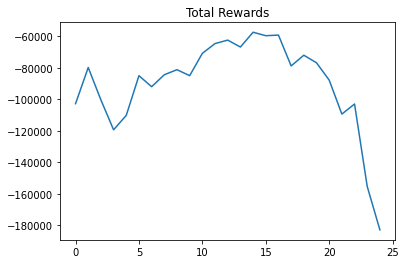

In [153]:
end = time.time()
plt.plot(avg_total_rewards)
plt.title("Total Rewards")
plt.show()

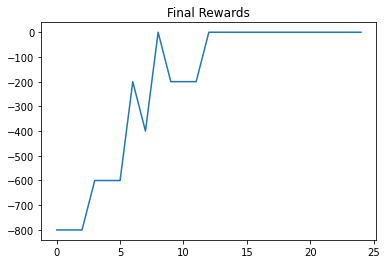

In [154]:
plt.plot(avg_final_rewards)
plt.title("Final Rewards")
plt.show()


訓練時間


In [ ]:
print(f"total time is {end-start} sec")

total time is 1569.89670419693 sec


## 測試

In [170]:
agent.load("model")
agent.network.eval()  # 測試前先將 network 切換為 evaluation 模式
NUM_OF_TEST = 15 
test_total_reward = []
test_total_last = []
test_total_time = []
test_total_crash = []
action_list = []
env = environment(40 , 0.25 , 0)
for i in range(NUM_OF_TEST):
  actions = []
  #img = plt.imshow(env.render(mode='rgb_array'))

  total_reward = 0
  del env
  env = environment(100  , 0.25 , 0)
  state , _ , _ = env.step([0,0,0,0,0,0,0,0])
  

  done = False
  reward = 0
  while not done:
      action, _ = agent.sample(state , 0)
      actions.append(action)
      state, reward, done = env.step(action)

      total_reward += reward

      #img.set_data(env.render(mode='rgb_array'))
      #display.display(plt.gcf())
      #display.clear_output(wait=True)
  
  test_total_last.append(reward)
  print(total_reward)
  test_total_reward.append(total_reward)
  test_total_time.append(env.return_timeframe())
  print(env.return_crash() , env.return_timeframe())
  test_total_crash.append(env.return_crash())
  action_list.append(actions) #儲存你測試的結果
  print("length of actions is ", len(actions))

-141000.0
66 179
length of actions is  245
-118000.0
48 173
length of actions is  221
-107000.0
55 155
length of actions is  210
-151000.0
89 165
length of actions is  254
-129000.0
62 172
length of actions is  234
-118000.0
85 139
length of actions is  224
-116000.0
67 152
length of actions is  219
-143000.0
82 164
length of actions is  246
-113000.0
54 163
length of actions is  217
-151000.0
80 176
length of actions is  256
-144000.0
76 171
length of actions is  247
-117000.0
77 144
length of actions is  221
-147000.0
63 192
length of actions is  255
-138000.0
77 164
length of actions is  241
-131000.0
64 170
length of actions is  234


In [171]:
print(f"Your final average reward is : %.2f"%np.mean(test_total_reward))
print(f"Your final average time is : %.2f"%np.mean(test_total_time))
print(f"Your final average crash is : %.2f"%np.mean(test_total_crash))
print(f"Your final average last is : %.2f"%np.mean(test_total_last))

Your final average reward is : -130933.33
Your final average time is : 165.27
Your final average crash is : 69.67
Your final average last is : 0.00


Action list 的長相

In [ ]:
print("Action list looks like ", action_list)
print("Action list's shape looks like ", np.shape(action_list))

Action list looks like  [[tensor([0., 1., 1., 0., 0., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 0., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 0.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 0.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([0., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([1., 1., 1., 1., 1., 1., 1., 1.]), tensor([

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
